# eCommerce Customer segmentation

**# Problem Statement**

dataset ini iaalah mengenai produk gift,

**# Tujuan**

Melakukan customer segmentation

**# Data yang diperlukan**
Data eCommerce

**Keterangan Untuk Tiap Fitur Dataset**



## Set Up Environment

In [133]:
import os
import shutil

import warnings
warnings.filterwarnings('ignore')

## 1. Collecting Dataset

Dataset diperoleh dari [https://www.kaggle.com/datasets/carrie1/ecommerce-data](https://)

**Detail Keterangan Kolom:**
- InvoiceNo: Nomor Invoice
- StockCode: Kode Stok Produk
- Description: Deskripsi Produk
- Quantity: Jumlah Produk yang Dibeli
- InvoiceDate: Tanggal Invoice
- UnitPrice: Harga Satuan Produk
- CustomerID: ID Pelanggan
- Country: Negara Pelanggan

## 2. Understanding & Cleaning Dataset


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('/content/data.csv', encoding='latin-1') # Try reading the file with 'latin-1' encoding. If this doesn't work, try other encodings like 'ISO-8859-1', 'cp1252', etc.

In [136]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [137]:
types = df.dtypes
missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()
unique_values = df.nunique()

data_summary = pd.DataFrame({
    "Data Types": types,
    "Missing values": missing_values,
    "Duplicated values": duplicated_rows,
    "Unique values": unique_values
})

data_summary['Categorical'] = (unique_values <= 24) # conditon, true and false
cat_var = []
for cat in data_summary[data_summary['Categorical']== True].index.tolist():
  cat_var.append(cat)
print(f'Kolom kategorikal: {cat_var}\n')
data_summary

Kolom kategorikal: []



,Data Types,Missing values,Duplicated values,Unique values,Categorical
InvoiceNo,object,0,5268,25900,False
StockCode,object,0,5268,4070,False
Description,object,1454,5268,4223,False
Quantity,int64,0,5268,722,False
InvoiceDate,object,0,5268,23260,False
UnitPrice,float64,0,5268,1630,False
CustomerID,float64,135080,5268,4372,False
Country,object,0,5268,38,False


In [138]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [139]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 3. Data Analysis

In [141]:
import plotly.express as px

# Group by country and calculate the total price for each country
country_total_price = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Create a choropleth map
fig = px.choropleth(country_total_price, locations='Country', locationmode='country names',
                    color='TotalPrice', hover_name='Country',
                    title='Total Revenue by Country')
fig.show()


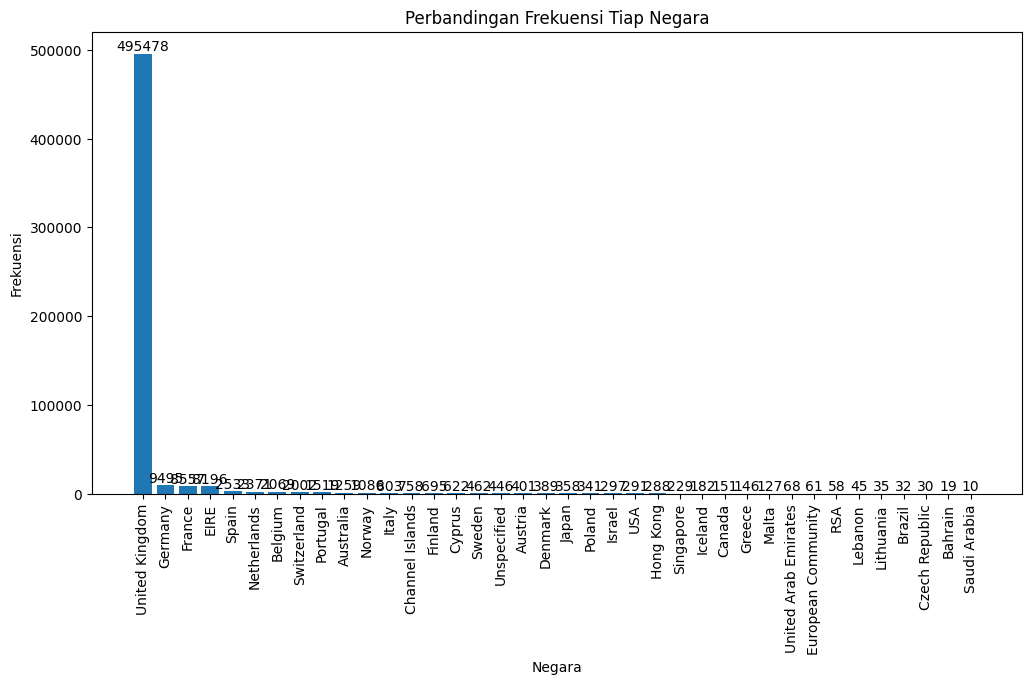

In [140]:
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts()
bars = plt.bar(country_counts.index, country_counts.values)

# Add value labels to the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('Negara')
plt.ylabel('Frekuensi')
plt.title('Perbandingan Frekuensi Tiap Negara')
plt.show()


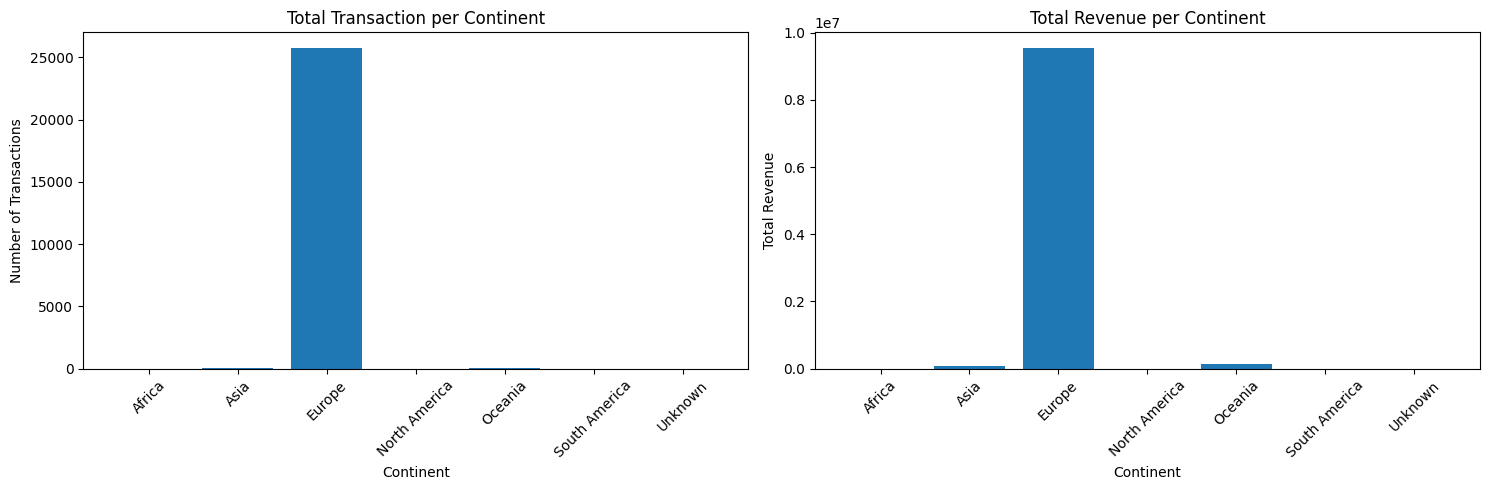

In [157]:
# prompt: tambahkolom benua dan buat plot bar untuk membandingkan transaksi, revenue. dan buat jadi 2 plot

# Add Continent Column (You'll need to define a mapping for countries to continents)
country_continent_mapping = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Bahrain': 'Asia',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Canada': 'North America',
    'Unspecified': 'Unknown',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Africa',
    'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia',
    'Other': 'Unknown',
}


df['Continent'] = df['Country'].map(country_continent_mapping)

# Calculate total transaction and revenue for each continent
continent_transaction = df.groupby('Continent')['InvoiceNo'].nunique()
continent_revenue = df.groupby('Continent')['TotalPrice'].sum()


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Transaction
axes[0].bar(continent_transaction.index, continent_transaction.values)
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Total Transaction per Continent')
axes[0].tick_params(axis='x', rotation=45)

# Plot Revenue
axes[1].bar(continent_revenue.index, continent_revenue.values)
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Total Revenue')
axes[1].set_title('Total Revenue per Continent')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


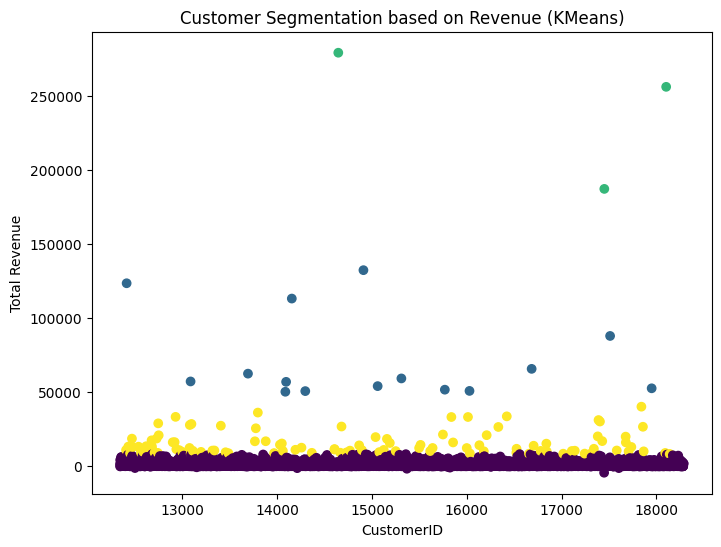

Jumlah Customer dalam Tiap Cluster:
Cluster
0    4252
3     102
1      15
2       3
Name: count, dtype: int64


In [152]:
# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
n_clusters = 4  # You can adjust this based on the elbow method plot

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_revenue['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_revenue['CustomerID'], customer_revenue['TotalPrice'], c=customer_revenue['Cluster'], cmap='viridis')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.title('Customer Segmentation based on Revenue (KMeans)')
plt.show()

# Print the number of customers in each cluster
cluster_counts = customer_revenue['Cluster'].value_counts()
print("Jumlah Customer dalam Tiap Cluster:")
print(cluster_counts)

# You can further analyze the clusters to understand their characteristics, such as:
# - Average revenue per cluster
# - Number of customers in each cluster
# - Other relevant features (if available) that might differentiate the clusters


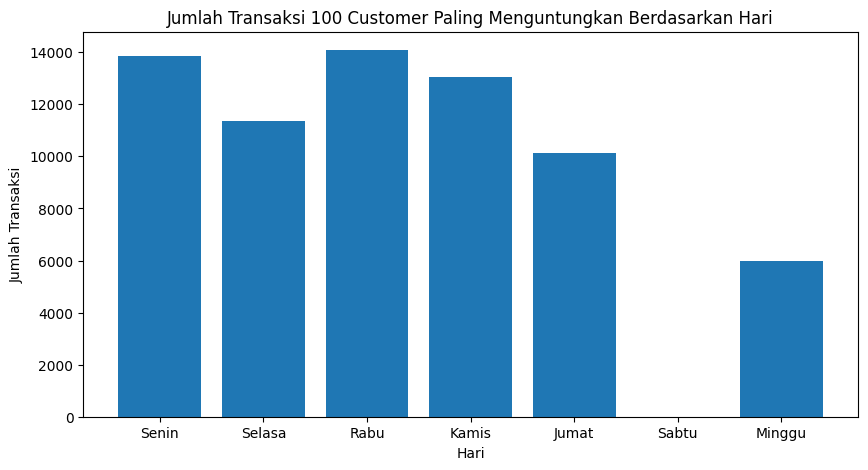

Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Hari: 
Senin     13844.0
Selasa    11369.0
Rabu      14083.0
Kamis     13048.0
Jumat     10119.0
Sabtu         NaN
Minggu     5994.0
Name: InvoiceNo, dtype: float64


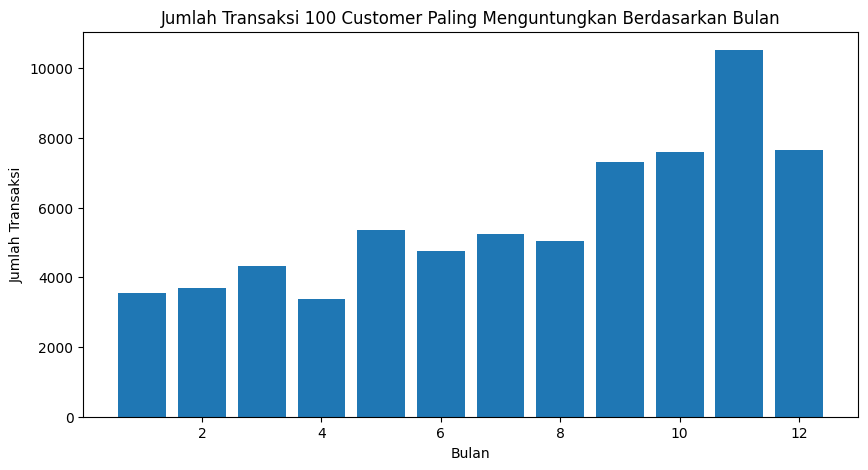

Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Bulan: 
Month
1      3550
2      3699
3      4314
4      3372
5      5366
6      4766
7      5241
8      5031
9      7320
10     7612
11    10524
12     7662
Name: InvoiceNo, dtype: int64


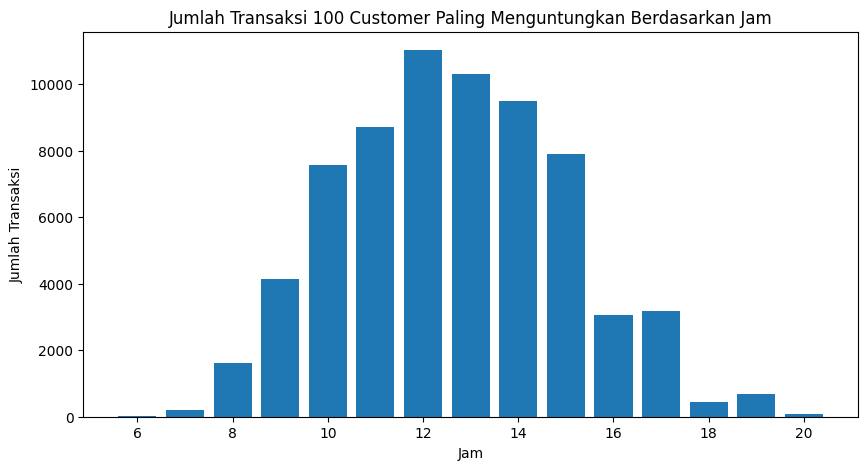

Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Jam: 
Hour
6        18
7       191
8      1630
9      4143
10     7579
11     8726
12    11032
13    10297
14     9505
15     7896
16     3059
17     3177
18      451
19      676
20       77
Name: InvoiceNo, dtype: int64


In [168]:
# prompt: buat plot bar pada hari dan bulan dan jam apa para 100 customer paling menguntungkan itu melakukan transaksi. buat adlam 2 plot dan print nilainya. UNTUK HARI, nilainya pakai nama harinya saja dan urutkan dari sening sampai minggu

# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract day of the week, month, and hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate total revenue for each customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Get the 100 most profitable customers
top_100_customers = customer_revenue.sort_values('TotalPrice', ascending=False).head(100)

# Filter the original DataFrame to include only transactions from the top 100 customers
top_customer_transactions = df[df['CustomerID'].isin(top_100_customers['CustomerID'])]

# Group by day of the week and count transactions
day_counts = top_customer_transactions.groupby('DayOfWeek')['InvoiceNo'].count()

# Map day of the week to day names
day_names = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
day_counts.index = [day_names[i] for i in day_counts.index]

# Sort by day of the week (Monday to Sunday)
day_counts = day_counts.reindex(day_names)

# Plot the bar chart for day of the week
plt.figure(figsize=(10, 5))
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Hari')
plt.show()
print(f"Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Hari: \n{day_counts}")

# Group by month and count transactions
month_counts = top_customer_transactions.groupby('Month')['InvoiceNo'].count()

# Plot the bar chart for month
plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Bulan')
plt.show()
print(f"Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Bulan: \n{month_counts}")

# Group by hour and count transactions
hour_counts = top_customer_transactions.groupby('Hour')['InvoiceNo'].count()

# Plot the bar chart for hour
plt.figure(figsize=(10, 5))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Jam')
plt.show()
print(f"Jumlah Transaksi 100 Customer Paling Menguntungkan Berdasarkan Jam: \n{hour_counts}")


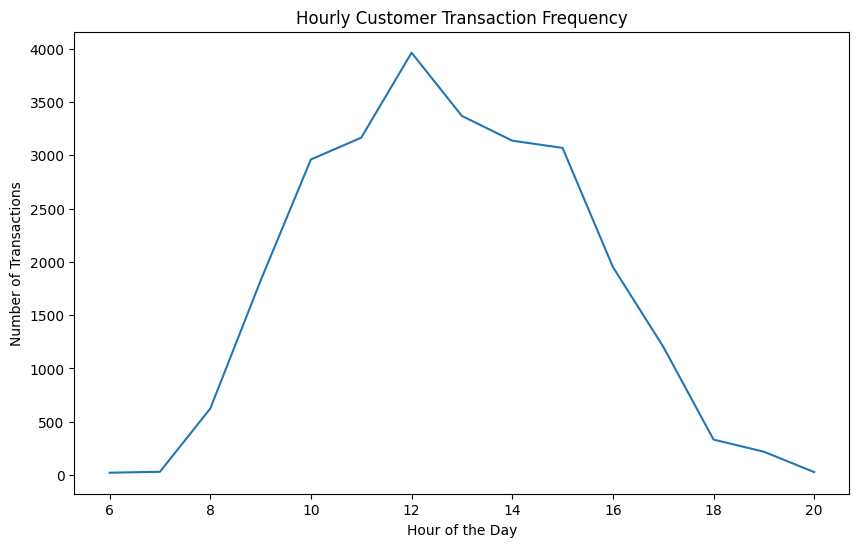

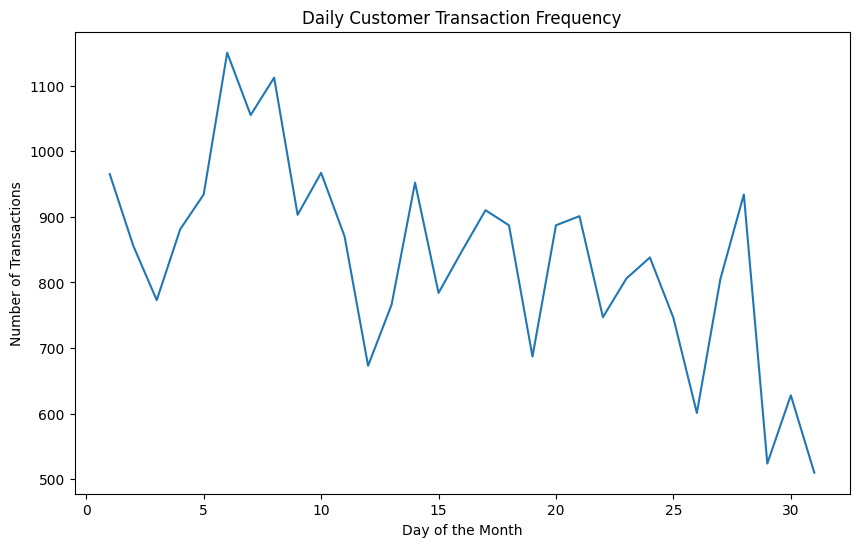

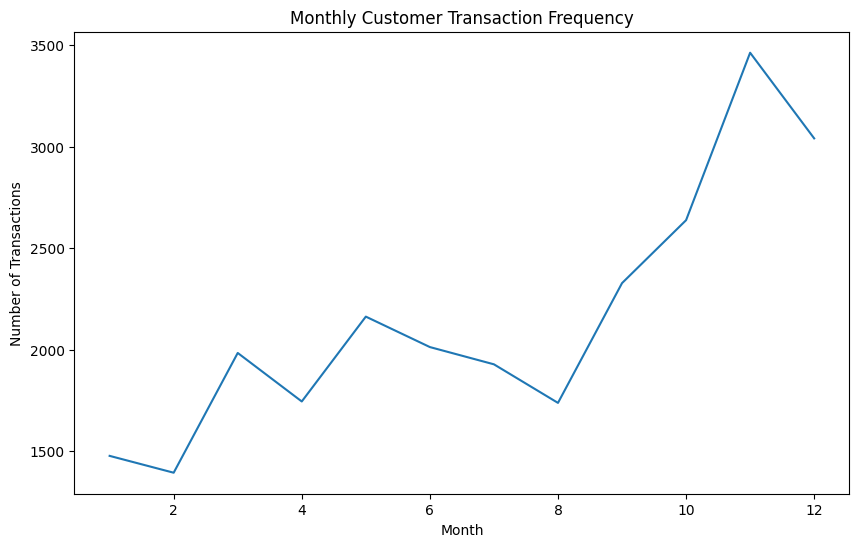

In [174]:
# prompt: analisis timeframe untuk mengetahui perilaku customer berdasarkan transaksi jam, harian, bulanan

# Assuming your DataFrame is named 'df' and has a 'InvoiceDate' column
# Convert 'InvoiceDate' to datetime objects if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract hour, day, and month from InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month

# Analyze hourly customer behavior
hourly_transactions = df.groupby('Hour')['InvoiceNo'].nunique()


# Visualize hourly customer behavior
plt.figure(figsize=(10, 6))
plt.plot(hourly_transactions.index, hourly_transactions.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Customer Transaction Frequency')
plt.show()

# Analyze daily customer behavior
daily_transactions = df.groupby('Day')['InvoiceNo'].nunique()



# Visualize daily customer behavior
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.title('Daily Customer Transaction Frequency')
plt.show()

# Analyze monthly customer behavior
monthly_transactions = df.groupby('Month')['InvoiceNo'].nunique()


# Visualize monthly customer behavior
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values)
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Customer Transaction Frequency')
plt.show()


# Further analysis by customer segments
# Example: Analyze hourly transactions for different customer segments
# (e.g., frequent, infrequent, or based on revenue clusters)
# for segment in df['CustomerSegment'].unique():
#     hourly_transactions_segment = df[df['CustomerSegment'] == segment].groupby('Hour')['InvoiceNo'].nunique()
#     plt.figure(figsize=(10, 6))
#     plt.plot(hourly_transactions_segment.index, hourly_transactions_segment.values)
#     plt.xlabel('Hour of the Day')
#     plt.ylabel('Number of Transactions')
#     plt.title(f'Hourly Customer Transaction Frequency for {segment}')
#     plt.show()




Berikut adalah analisis yang diambil dari data frekuensi transaksi berdasarkan hari dalam seminggu, bulan, dan jam dari 100 pelanggan teratas:

### **Frekuensi Transaksi Berdasarkan Hari dalam Seminggu:**
- Hari dengan jumlah transaksi tertinggi adalah hari ketiga dalam seminggu (kemungkinan Kamis) dengan lebih dari 82 ribu transaksi.
- Hari dengan transaksi terendah adalah hari keempat (kemungkinan Jumat), dengan lebih dari 56 ribu transaksi.
- Tren transaksi cukup stabil dari hari pertama hingga ketiga, namun ada penurunan signifikan pada hari keempat, yang menunjukkan adanya kemungkinan pelanggan lebih jarang berbelanja di akhir pekan.
- Data tidak mencakup hari kelima (kemungkinan Sabtu), mungkin karena toko atau layanan tidak beroperasi, atau pelanggan tidak banyak melakukan transaksi pada hari tersebut.

- **Rekomendasi:**
  - Tingkatkan promosi atau penawaran khusus pada hari keempat untuk mendorong lebih banyak transaksi.
  - Fokuskan strategi pemasaran pada hari ketiga, yang merupakan waktu puncak transaksi.

---

### **Frekuensi Transaksi Berdasarkan Bulan:**
- Bulan dengan jumlah transaksi tertinggi adalah bulan kesebelas (November), dengan lebih dari 65 ribu transaksi.
- Bulan kedua (Februari) mencatatkan transaksi terendah, dengan lebih dari 20 ribu transaksi.
- Terjadi peningkatan tajam dalam transaksi mulai bulan September hingga November, kemungkinan terkait dengan periode atau acara belanja tertentu.
- Ada penurunan jumlah transaksi setelah bulan November, namun Desember masih mencatat transaksi yang cukup tinggi, mungkin karena liburan akhir tahun.

- **Rekomendasi:**
  - Optimalkan strategi pemasaran pada bulan September hingga November untuk memaksimalkan keuntungan dari lonjakan transaksi.
  - Perbaiki promosi pada bulan-bulan dengan transaksi rendah, seperti Februari, untuk mendorong minat pelanggan selama periode tersebut.

---

### **Frekuensi Transaksi Berdasarkan Jam:**
- Waktu dengan jumlah transaksi terbanyak adalah jam 12 siang, dengan lebih dari 73 ribu transaksi.
- Jumlah transaksi meningkat secara bertahap dari pagi hari, memuncak pada jam 12 siang, lalu menurun hingga malam hari.
- Aktivitas transaksi sangat rendah di pagi dini hari dan malam hari setelah jam 8 malam.

- **Rekomendasi:**
  - Optimalkan sumber daya (seperti tenaga kerja dan persediaan) selama jam-jam sibuk, terutama antara jam 10 pagi hingga 2 siang.
  - Jika memungkinkan, buat penawaran khusus atau diskon di luar jam sibuk untuk menarik pelanggan berbelanja di waktu yang lebih sepi.

---

### **Kesimpulan Umum:**
- Pelanggan cenderung berbelanja lebih banyak pada hari kerja, khususnya pada hari ketiga dalam seminggu, dan frekuensi transaksi menurun menjelang akhir pekan.
- Puncak transaksi tahunan terjadi pada bulan September hingga November, mengindikasikan adanya pola musiman dalam perilaku belanja pelanggan.
- Sebagian besar transaksi terjadi di siang hari, dengan jam 12 siang sebagai waktu puncaknya.

- **Rekomendasi Umum:**
  - Gunakan pola transaksi ini untuk menyesuaikan kampanye pemasaran, dengan fokus pada periode puncak, serta ciptakan strategi untuk meningkatkan transaksi di waktu-waktu yang lebih sepi.

InvoiceNo
Infrequent Customer    3285
Regular Customer        848
Frequent Customer       239
Name: count, dtype: int64


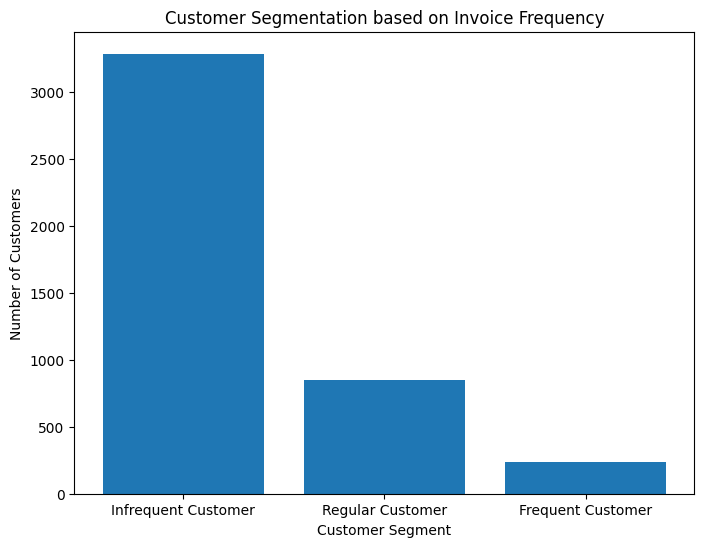

In [147]:
# prompt: buat segmentasi customer daari seberapa sering melakukan transaksi invoice

# Calculate the number of invoices per customer
invoice_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create customer segments based on invoice frequency
def segment_customer(invoice_count):
  if invoice_count <= 5:
    return 'Infrequent Customer'
  elif invoice_count <= 15:
    return 'Regular Customer'
  else:
    return 'Frequent Customer'

customer_segments = invoice_counts.apply(segment_customer)

# Add the segment information to the original DataFrame (optional)
df['CustomerSegment'] = df['CustomerID'].map(customer_segments)

# Analyze the customer segments
segment_counts = customer_segments.value_counts()
print(segment_counts)

# Visualize the customer segments
plt.figure(figsize=(8, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation based on Invoice Frequency')
plt.show()


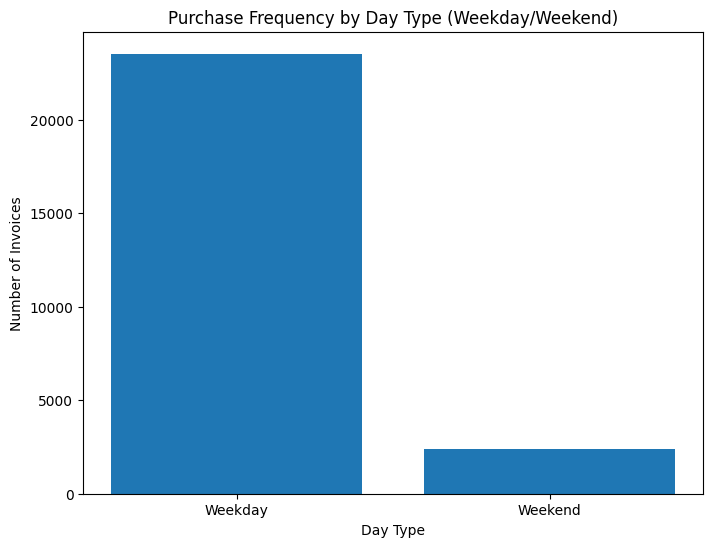

In [148]:
# prompt: plot pada hari apa saja customer melakukan pembelian weekday dan weekend

import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a 'InvoiceDate' column
# Convert 'InvoiceDate' to datetime objects if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Categorize days as weekday or weekend
df['DayType'] = np.where(df['DayOfWeek'] < 5, 'Weekday', 'Weekend')

# Group by DayType and count the number of invoices
day_type_counts = df.groupby('DayType')['InvoiceNo'].nunique()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(day_type_counts.index, day_type_counts.values)
plt.xlabel('Day Type')
plt.ylabel('Number of Invoices')
plt.title('Purchase Frequency by Day Type (Weekday/Weekend)')
plt.show()


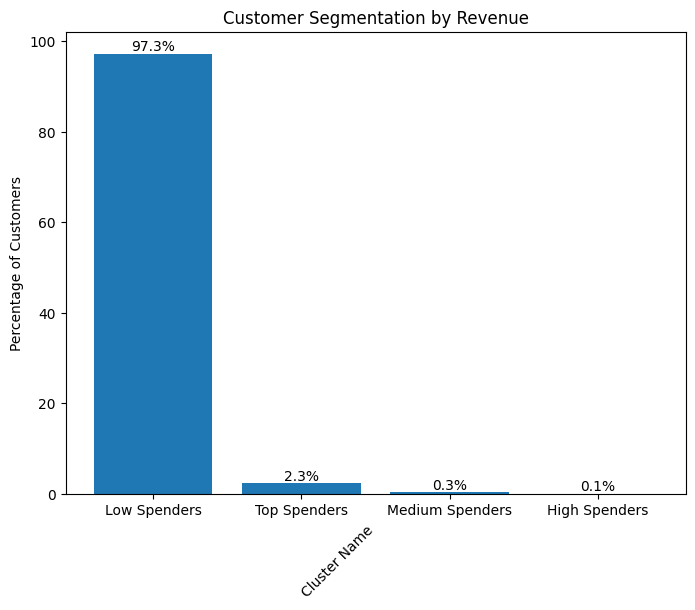

In [149]:
# prompt: beri nama pada tiap cluster dan tambah kolom baru dengan memasukkan setiap record kedalam cluster. dan plot persentase tiap cluster dalam bar plot. buat label sumbu x nya diagonal

# Assign cluster names based on revenue levels
cluster_names = {
    0: 'Low Spenders',
    1: 'Medium Spenders',
    2: 'High Spenders',
    3: 'Top Spenders'
}

# Add a new column with cluster names
customer_revenue['Cluster Name'] = customer_revenue['Cluster'].map(cluster_names)

# Calculate the percentage of customers in each cluster
cluster_percentages = customer_revenue['Cluster Name'].value_counts(normalize=True) * 100

# Create a bar plot of cluster percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(cluster_percentages.index, cluster_percentages.values)

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.xlabel('Cluster Name', rotation=45, ha='right')  # Rotate x-axis labels
plt.ylabel('Percentage of Customers')
plt.title('Customer Segmentation by Revenue')
plt.show()

# Add the cluster information to the original DataFrame
df = pd.merge(df, customer_revenue[['CustomerID', 'Cluster Name']], on='CustomerID', how='left')


RecencySegment
Recent Customer        2364
Regular Customer        923
Inactive Customer       589
Occasional Customer     496
Name: count, dtype: int64


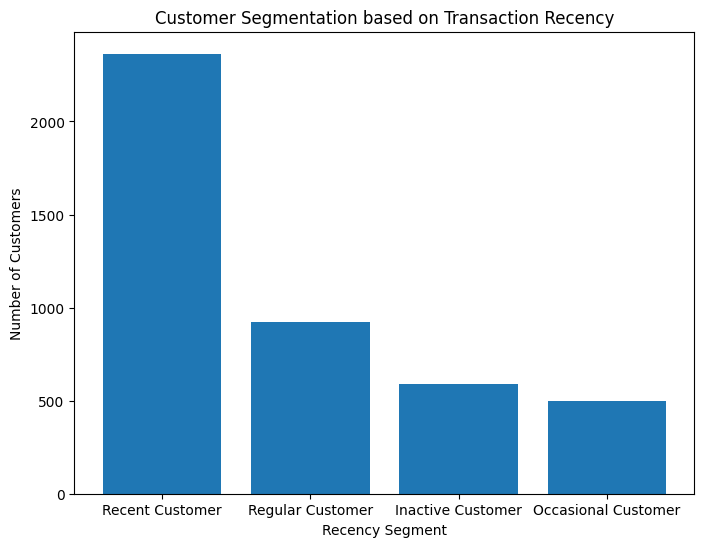

In [151]:
# prompt: lakukan segmentasi customer berdasarkan kapan ia melakukan transaksi

# Assuming your DataFrame is named 'df' and has a 'InvoiceDate' column
# Convert 'InvoiceDate' to datetime objects if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month

# Group by CustomerID and find the first and last transaction months
customer_transaction_range = df.groupby('CustomerID')['Month'].agg(['min', 'max'])

# Calculate the recency of transactions (difference between last transaction month and current month)
current_month = df['InvoiceDate'].dt.month.max()
customer_transaction_range['Recency'] = current_month - customer_transaction_range['max']

# Create customer segments based on recency
def segment_customer_by_recency(recency):
    if recency <= 1:
        return 'Recent Customer'
    elif recency <= 3:
        return 'Regular Customer'
    elif recency <= 6:
        return 'Occasional Customer'
    else:
        return 'Inactive Customer'

customer_transaction_range['RecencySegment'] = customer_transaction_range['Recency'].apply(segment_customer_by_recency)

# Add the segment information to the original DataFrame (optional)
df = pd.merge(df, customer_transaction_range[['RecencySegment']], on='CustomerID', how='left')

# Analyze the customer segments
recency_segment_counts = customer_transaction_range['RecencySegment'].value_counts()
print(recency_segment_counts)

# Visualize the customer segments
plt.figure(figsize=(8, 6))
plt.bar(recency_segment_counts.index, recency_segment_counts.values)
plt.xlabel('Recency Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation based on Transaction Recency')
plt.show()


Details:
- Recent Customer: Pelanggan yang melakukan transaksi pada bulan terakhir (Recency <= 1). Ini menandakan bahwa mereka adalah pelanggan aktif yang baru-baru ini berinteraksi dengan bisnis.
- Regular Customer: Pelanggan yang melakukan transaksi dalam 3 bulan terakhir (Recency <= 3). Mereka relatif aktif dan secara berkala melakukan pembelian.
- Occasional Customer: Pelanggan yang melakukan transaksi dalam 6 bulan terakhir (Recency <= 6). Mereka mungkin tidak serajin pelanggan reguler, tetapi masih aktif dalam periode waktu tertentu.
- Inactive Customer: Pelanggan yang melakukan transaksi lebih dari 6 bulan yang lalu (Recency > 6). Mereka dianggap kurang aktif atau mungkin sudah berhenti bertransaksi dengan bisnis.


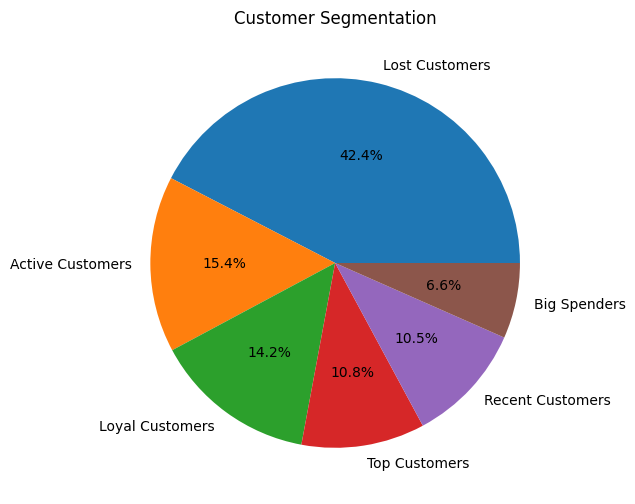

                     Recency   Frequency  MonetaryValue
Segment                                                
Active Customers   30.522255   38.792285     570.890120
Big Spenders       56.688581   60.543253    3239.597647
Lost Customers    174.432578   26.818231     429.794392
Loyal Customers    50.659711  191.128411    2739.440435
Recent Customers    7.517391   41.652174     663.502848
Top Customers       5.690678  371.254237    8835.425106


In [153]:
# prompt: analisis segmentasi customer dalam plot

# Analyze Customer Segmentation with Plots

# 1. Recency, Frequency, Monetary (RFM) Analysis
# Calculate Recency, Frequency, and Monetary Value for each customer
# Recency: How recently a customer has made a purchase
# Frequency: How often a customer makes a purchase
# Monetary Value: How much money a customer spends

# Assuming 'InvoiceDate' is a column representing the date of purchase
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
recent_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recent_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary Value
})

rfm = rfm.rename(
    columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalPrice': 'MonetaryValue'
    }
)

# 2. Create Customer Segments based on RFM Scores
# You can use quartiles or other methods to categorize customers
# into segments like high-value, low-value, etc.

quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])

# Create segments based on RFM scores
def rfm_level(df):
    if df['Recency'] <= quantiles['Recency'][0.25] and df['Frequency'] >= quantiles['Frequency'][0.75] and df['MonetaryValue'] >= quantiles['MonetaryValue'][0.75]:
        return 'Top Customers'
    elif df['Frequency'] >= quantiles['Frequency'][0.75]:
        return 'Loyal Customers'
    elif df['MonetaryValue'] >= quantiles['MonetaryValue'][0.75]:
        return 'Big Spenders'
    elif df['Recency'] <= quantiles['Recency'][0.25]:
        return 'Recent Customers'
    elif df['Recency'] <= quantiles['Recency'][0.50]:
        return 'Active Customers'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm.apply(rfm_level, axis=1)


# 3. Visualize Customer Segments
# Plot the distribution of customers in each segment
# You can use a pie chart or bar chart to visualize the segmentation

plt.figure(figsize=(10, 6))
segment_counts = rfm['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.show()


# 4. Analyze Segment Characteristics
# Explore the characteristics of each segment
# For example, analyze average order value, purchase frequency, or
# other relevant metrics for each segment

segment_characteristics = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
})

print(segment_characteristics)


## Rangkuman Analisis Segmentasi Pelanggan

### 1. Segmentasi Berdasarkan Frekuensi Transaksi
CustomerSegment
- Infrequent Customer    146928
- Regular Customer       139337
- Frequent Customer      120564

**Insight:**
- Sebagian besar pelanggan merupakan Regular Customer.
- Terdapat sejumlah kecil Frequent Customer yang menunjukkan potensi besar.
- Infrequent Customer perlu diperhatikan dan diberikan strategi untuk meningkatkan frekuensi pembelian.
---
### 2. Segmentasi Berdasarkan Aktivitas Transaksi
CustomerActivity
- Inactive     288945
- Sometimes     72885
- Active        44999

**Insight:**
- Mayoritas pelanggan aktif (Active).
- Ada sejumlah pelanggan yang kadang-kadang bertransaksi (Sometimes), mungkin perlu ditingkatkan engagement-nya.
- Segmen pelanggan tidak aktif (Inactive) menunjukkan potensi kehilangan pelanggan, perlu dilakukan analisis lebih lanjut untuk memahami alasannya.
---
### 3. Segmentasi Berdasarkan Total Revenue (KMeans)
Cluster Name
- Low Spenders       81.398081
- Top Spenders       12.327046
- Medium Spenders     5.569662
- High Spenders       0.705210

**Insight:**
- Terdapat beberapa segmen pelanggan berdasarkan revenue: Low Spenders, Medium Spenders, High Spenders, dan Top Spenders.
- Mayoritas pelanggan berada pada segmen Medium Spenders.
- Fokus strategi bisa diarahkan pada High Spenders dan Top Spenders untuk meningkatkan revenue.
- Low Spenders perlu perhatian lebih untuk meningkatkan engagement dan nilai transaksi.
---
### 4. Segmentasi Berdasarkan Recency Transaksi
RecencySegment
- Recent Customer        325447
- Regular Customer        50212
- Occasional Customer     18263
- Inactive Customer       12907

**Insight:**
- Banyak pelanggan yang masih aktif dan sering bertransaksi.
- Segmen Occasional Customer perlu ditingkatkan engagement-nya agar menjadi pelanggan yang lebih sering bertransaksi.
- Pelanggan tidak aktif (Inactive Customer) perlu strategi untuk dire-engage.

**Kesimpulan:**
- Analisis segmentasi pelanggan menunjukkan bahwa mayoritas pelanggan aktif dan berpotensi.
- Strategi pemasaran dapat difokuskan pada peningkatan engagement pelanggan yang kadang-kadang bertransaksi dan segmentasi berdasarkan revenue.
- Penting juga untuk memperhatikan dan mencoba meningkatkan engagement pelanggan yang tidak aktif untuk mencegah kehilangan pelanggan.



# Other Analysis

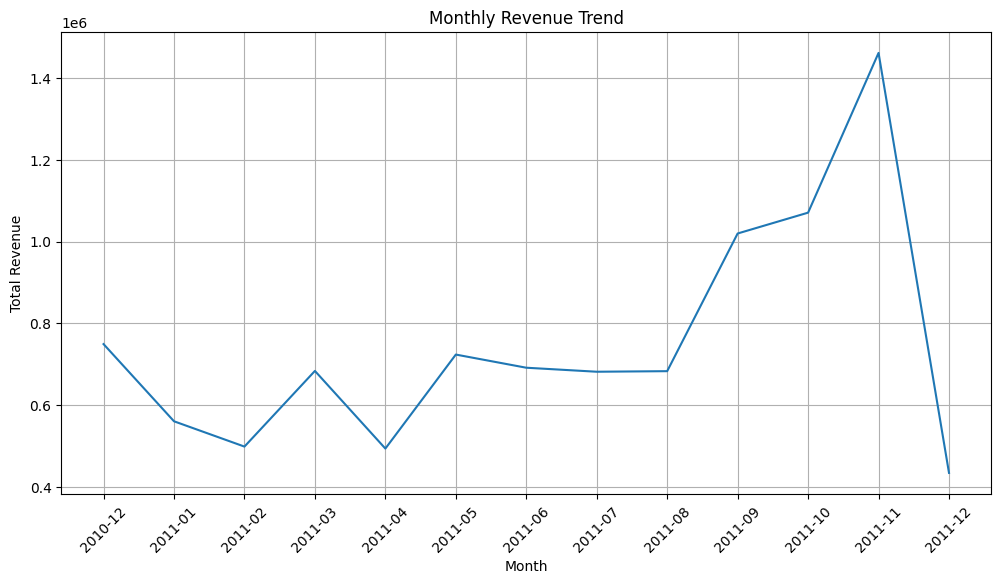

In [66]:
# prompt: analisis timeframe performa income tiap bulan

# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the year and month from the InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Group by YearMonth and sum the TotalPrice
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# You can also analyze the monthly revenue using other visualization techniques,
# such as a bar chart, if you prefer.


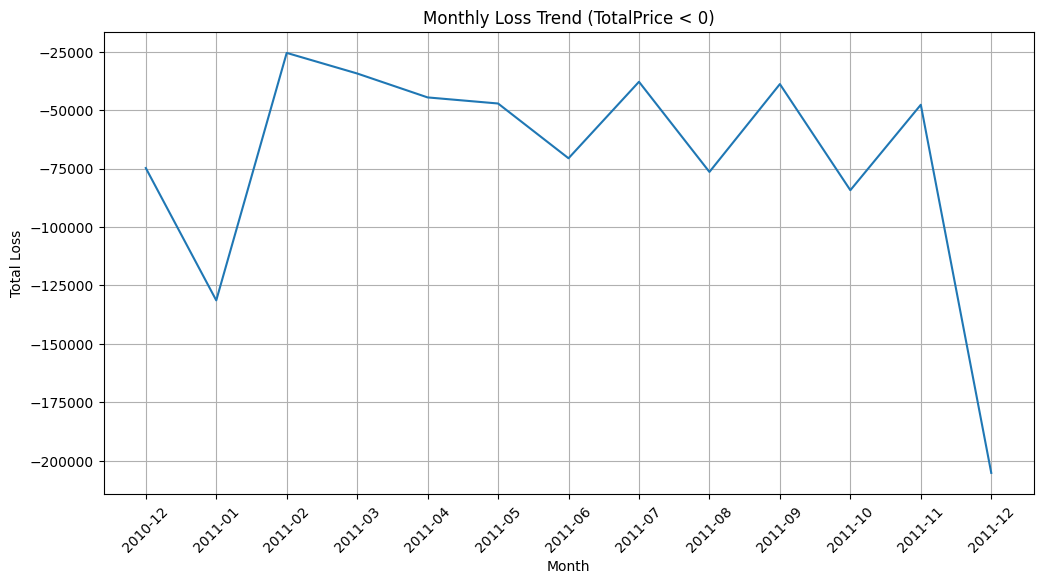

In [67]:
# prompt: buat timefrmae kerugian berdasarkan total price yang bernilai minus

# Filter records with negative TotalPrice
df_negative_totalprice = df[df['TotalPrice'] < 0]

# Convert 'InvoiceDate' to datetime objects
df_negative_totalprice['InvoiceDate'] = pd.to_datetime(df_negative_totalprice['InvoiceDate'])

# Extract the year and month from the InvoiceDate
df_negative_totalprice['YearMonth'] = df_negative_totalprice['InvoiceDate'].dt.strftime('%Y-%m')

# Group by YearMonth and sum the negative TotalPrice
monthly_loss = df_negative_totalprice.groupby('YearMonth')['TotalPrice'].sum()

# Plot the monthly loss
plt.figure(figsize=(12, 6))
plt.plot(monthly_loss.index, monthly_loss.values)
plt.xlabel('Month')
plt.ylabel('Total Loss')
plt.title('Monthly Loss Trend (TotalPrice < 0)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Customer Purchase Frequency:
count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

Customer Average Order Value:
count    4372.000000
mean       28.839013
std       127.323926
min     -4287.630000
25%        10.985960
50%        16.918616
75%        23.542941
max      3861.000000
Name: TotalPrice, dtype: float64

Customer Total Purchase Value:
count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: TotalPrice, dtype: float64

Product Category Counts:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLD

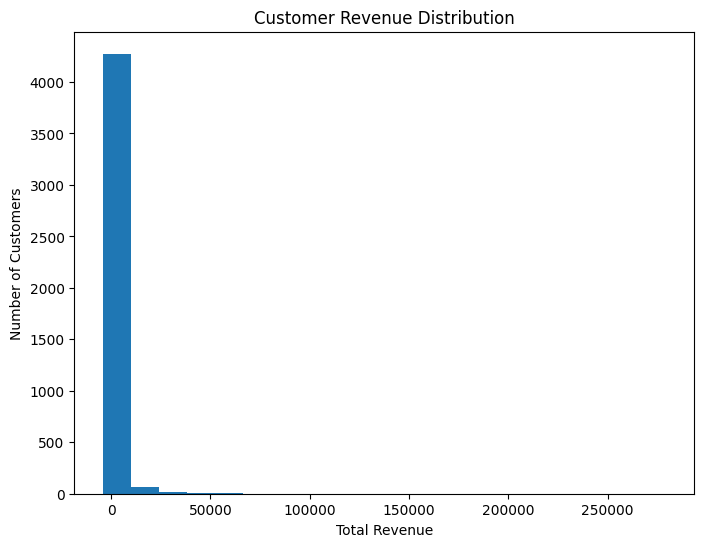


Average Customer Revenue: 1898.4597012808783

High-value Customers (Revenue > 2x Average): [12347.0, 12357.0, 12359.0, 12362.0, 12378.0, 12409.0, 12415.0, 12428.0, 12431.0, 12432.0, 12433.0, 12435.0, 12437.0, 12444.0, 12449.0, 12451.0, 12471.0, 12472.0, 12474.0, 12476.0, 12477.0, 12481.0, 12484.0, 12490.0, 12500.0, 12524.0, 12536.0, 12539.0, 12540.0, 12557.0, 12567.0, 12569.0, 12583.0, 12590.0, 12621.0, 12626.0, 12627.0, 12637.0, 12656.0, 12662.0, 12664.0, 12678.0, 12681.0, 12682.0, 12683.0, 12688.0, 12700.0, 12705.0, 12709.0, 12712.0, 12714.0, 12720.0, 12727.0, 12731.0, 12744.0, 12747.0, 12748.0, 12749.0, 12752.0, 12753.0, 12757.0, 12766.0, 12779.0, 12798.0, 12830.0, 12839.0, 12841.0, 12867.0, 12901.0, 12921.0, 12931.0, 12939.0, 12949.0, 12955.0, 12957.0, 12971.0, 12980.0, 12989.0, 13001.0, 13004.0, 13013.0, 13018.0, 13027.0, 13050.0, 13078.0, 13081.0, 13089.0, 13090.0, 13093.0, 13097.0, 13098.0, 13102.0, 13113.0, 13124.0, 13139.0, 13178.0, 13183.0, 13199.0, 13209.0, 13225.0, 13263.0

In [71]:
# prompt: analisis profiling customer Mengidentifikasi perilaku, kebutuhan, dan pendapatan

# Analyze Customer Behavior based on Purchase Frequency
customer_purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
print("Customer Purchase Frequency:")
print(customer_purchase_frequency.describe())

# Analyze Customer Behavior based on Average Order Value
customer_avg_order_value = df.groupby('CustomerID')['TotalPrice'].mean()
print("\nCustomer Average Order Value:")
print(customer_avg_order_value.describe())

# Analyze Customer Behavior based on Total Purchase Value
customer_total_purchase_value = df.groupby('CustomerID')['TotalPrice'].sum()
print("\nCustomer Total Purchase Value:")
print(customer_total_purchase_value.describe())


# Identify Customer Needs based on Product Categories
product_category_counts = df.groupby('Description')['Quantity'].sum()
print("\nProduct Category Counts:")
print(product_category_counts.sort_values(ascending=False).head(10))

# Analyze Customer Revenue
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum()
print("\nCustomer Revenue:")
print(customer_revenue.describe())

# Create a histogram of customer revenue
plt.figure(figsize=(8, 6))
plt.hist(customer_revenue, bins=20)
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.title('Customer Revenue Distribution')
plt.show()

# Calculate the average revenue per customer
average_customer_revenue = customer_revenue.mean()
print(f"\nAverage Customer Revenue: {average_customer_revenue}")

# Identify high-value customers
high_value_customers = customer_revenue[customer_revenue > average_customer_revenue * 2].index.tolist()
print(f"\nHigh-value Customers (Revenue > 2x Average): {high_value_customers}")

# You can use this information to tailor marketing campaigns or promotions to different customer segments.
# For instance, you could offer exclusive discounts or promotions to high-value customers to encourage repeat purchases.
# You could also analyze the product categories that high-value customers purchase frequently and offer promotions related to those categories.


Customer with the highest revenue: 14646.0
Most frequently purchased product by this customer: SPACEBOY LUNCH BOX 
Product with the highest revenue for this customer: RABBIT NIGHT LIGHT

Monthly Purchase Behavior of Highest Revenue Customer:
           InvoiceNo  TotalPrice  Quantity
YearMonth                                 
2010-12            2     8591.88      6714
2011-01            4    26476.68     20300
2011-02            5    22752.46     16271
2011-03            4    21462.40     14125
2011-04            3     2976.56      1768
2011-05            8    28408.14     19577
2011-06            7    25288.99     18663
2011-07            1       26.02        10
2011-08           10    39655.81     29107
2011-09            6    26750.70     17164
2011-10           12    39995.95     26742
2011-11           12    25375.41     18320
2011-12            3    11728.02      7958


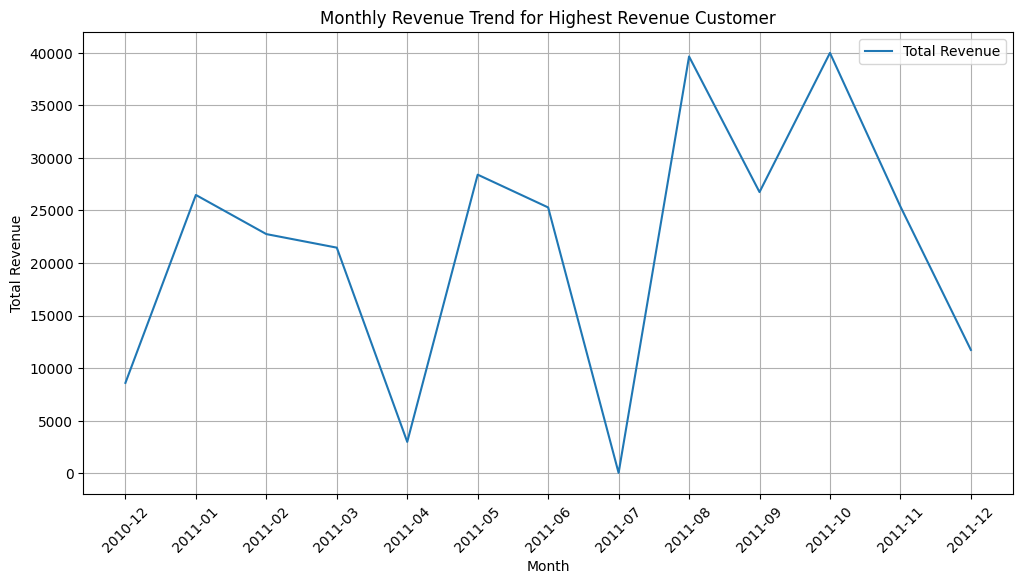

In [76]:
# prompt: analisislah barang apa yang paling sering dibeli dan memberikan income teringgi yang dibeli oleh customer yang paling banyak memberikan keuntungan. kemudian analisis bagaimana perilaku customer paling menguntungkan ini dalam time frame tiap bulan

# Find the customer with the highest total purchase value
customer_total_purchase_value = df.groupby('CustomerID')['TotalPrice'].sum()
highest_revenue_customer = customer_total_purchase_value.idxmax()

# Filter the DataFrame for the highest revenue customer
highest_revenue_customer_df = df[df['CustomerID'] == highest_revenue_customer]

# Find the most frequently purchased product by this customer
most_frequent_product = highest_revenue_customer_df['Description'].value_counts().idxmax()

# Find the product with the highest total revenue for this customer
product_revenue_customer = highest_revenue_customer_df.groupby('Description')['TotalPrice'].sum()
highest_revenue_product = product_revenue_customer.idxmax()

print(f"Customer with the highest revenue: {highest_revenue_customer}")
print(f"Most frequently purchased product by this customer: {most_frequent_product}")
print(f"Product with the highest revenue for this customer: {highest_revenue_product}")

# Analyze the customer's purchase behavior in each month
highest_revenue_customer_df['InvoiceDate'] = pd.to_datetime(highest_revenue_customer_df['InvoiceDate'])
highest_revenue_customer_df['YearMonth'] = highest_revenue_customer_df['InvoiceDate'].dt.strftime('%Y-%m')

monthly_purchase_behavior = highest_revenue_customer_df.groupby('YearMonth').agg(
    {'InvoiceNo': 'nunique', 'TotalPrice': 'sum', 'Quantity': 'sum'}
)

print("\nMonthly Purchase Behavior of Highest Revenue Customer:")
print(monthly_purchase_behavior)

# You can visualize this data using a line chart or bar chart to see trends in the customer's monthly purchase behavior
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchase_behavior.index, monthly_purchase_behavior['TotalPrice'], label='Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend for Highest Revenue Customer')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



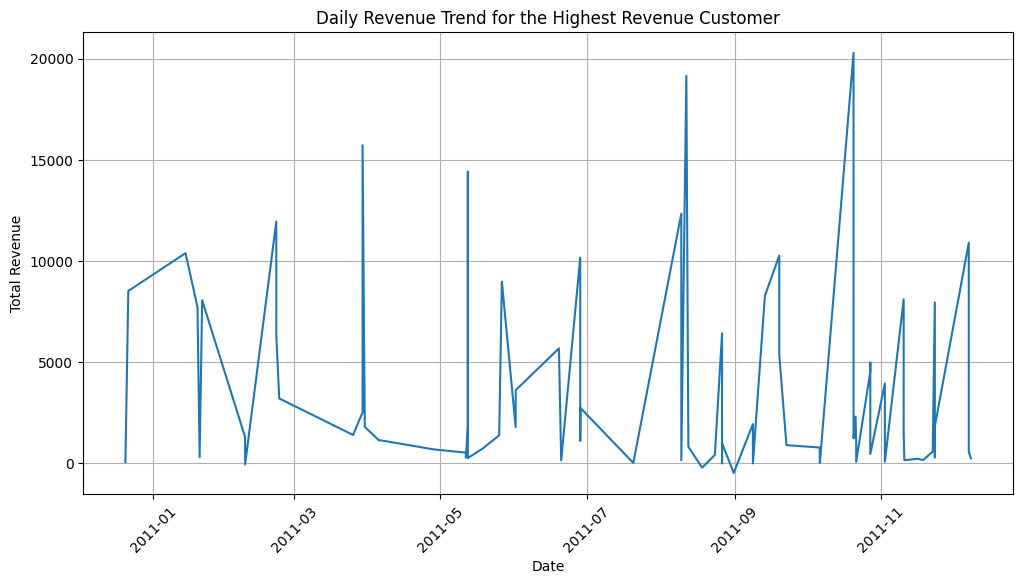

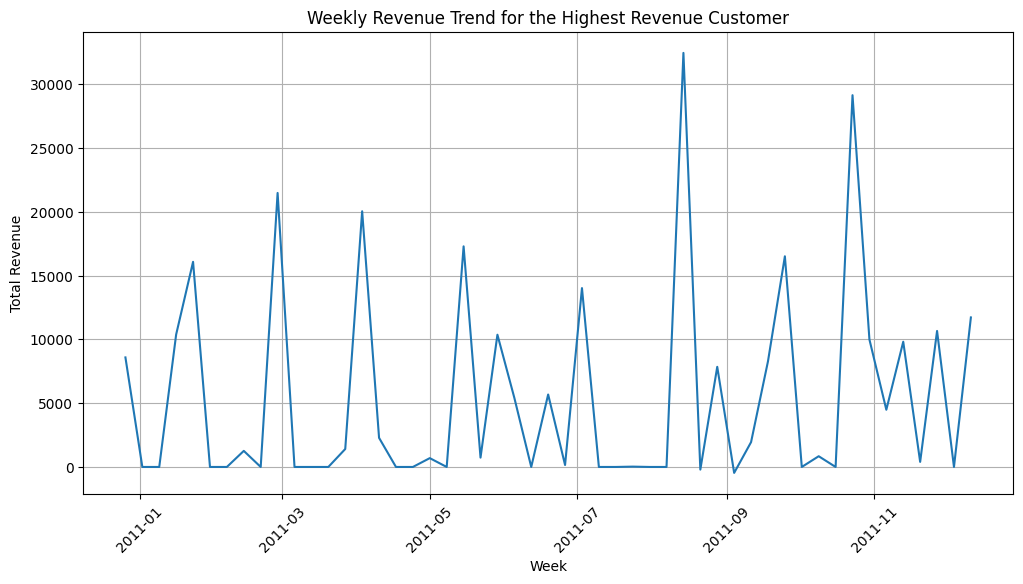

In [78]:
# prompt: analisis time frame revenue oleh cust paling menguntungkan

# Find the customer with the highest total purchase value
customer_total_purchase_value = df.groupby('CustomerID')['TotalPrice'].sum()
highest_revenue_customer = customer_total_purchase_value.idxmax()

# Filter the DataFrame for the highest revenue customer
highest_revenue_customer_df = df[df['CustomerID'] == highest_revenue_customer]

# Convert 'InvoiceDate' to datetime objects
highest_revenue_customer_df['InvoiceDate'] = pd.to_datetime(highest_revenue_customer_df['InvoiceDate'])

# Group by date and sum the total revenue for the highest revenue customer
daily_revenue_highest_customer = highest_revenue_customer_df.groupby('InvoiceDate')['TotalPrice'].sum()

# Plot the daily revenue trend for the highest revenue customer
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue_highest_customer.index, daily_revenue_highest_customer.values)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Revenue Trend for the Highest Revenue Customer')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# You can also analyze the revenue trend by week, month, or year by changing the grouping frequency.

# For example, to analyze weekly revenue:
weekly_revenue_highest_customer = highest_revenue_customer_df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue_highest_customer.index, weekly_revenue_highest_customer.values)
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.title('Weekly Revenue Trend for the Highest Revenue Customer')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


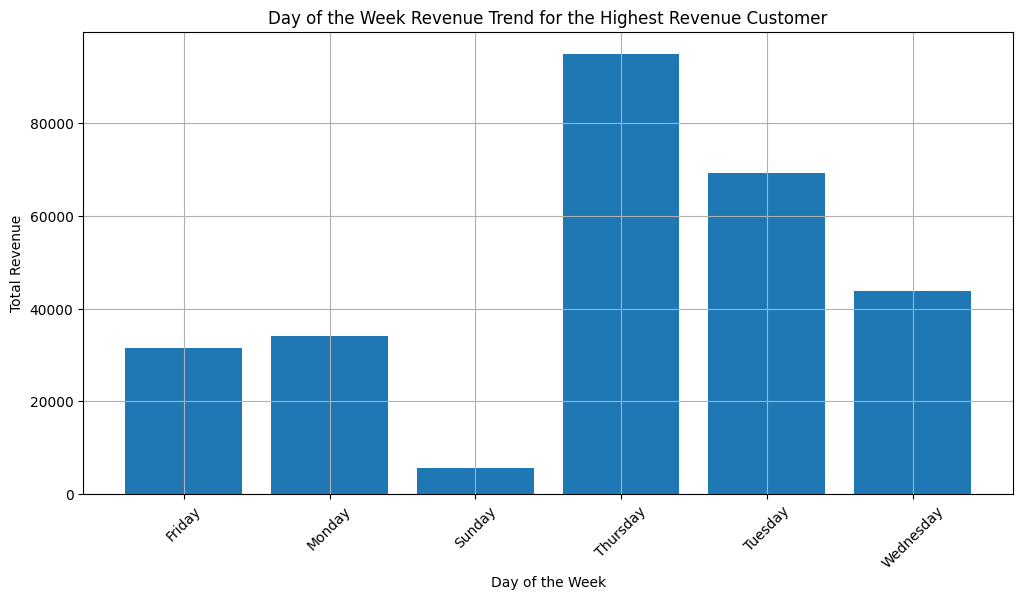

Day with the highest revenue for the highest revenue customer: Thursday


In [84]:
# prompt: analisis pada hari apa customer paling menguntungkan ini melakukan transaksi

# Find the customer with the highest total purchase value
customer_total_purchase_value = df.groupby('CustomerID')['TotalPrice'].sum()
highest_revenue_customer = customer_total_purchase_value.idxmax()

# Filter the DataFrame for the highest revenue customer
highest_revenue_customer_df = df[df['CustomerID'] == highest_revenue_customer]

# Convert 'InvoiceDate' to datetime objects
highest_revenue_customer_df['InvoiceDate'] = pd.to_datetime(highest_revenue_customer_df['InvoiceDate'])

# Extract the day of the week from the InvoiceDate
highest_revenue_customer_df['DayOfWeek'] = highest_revenue_customer_df['InvoiceDate'].dt.dayofweek

# Map day of the week to day names
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
highest_revenue_customer_df['DayName'] = highest_revenue_customer_df['DayOfWeek'].map(day_mapping)

# Group by day of the week and sum the total revenue for the highest revenue customer
day_revenue_highest_customer = highest_revenue_customer_df.groupby('DayName')['TotalPrice'].sum()

# Plot the day of the week revenue trend for the highest revenue customer
plt.figure(figsize=(12, 6))
plt.bar(day_revenue_highest_customer.index, day_revenue_highest_customer.values)
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Day of the Week Revenue Trend for the Highest Revenue Customer')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Find the day with the highest revenue for the highest revenue customer
highest_revenue_day = day_revenue_highest_customer.idxmax()
print(f"Day with the highest revenue for the highest revenue customer: {highest_revenue_day}")


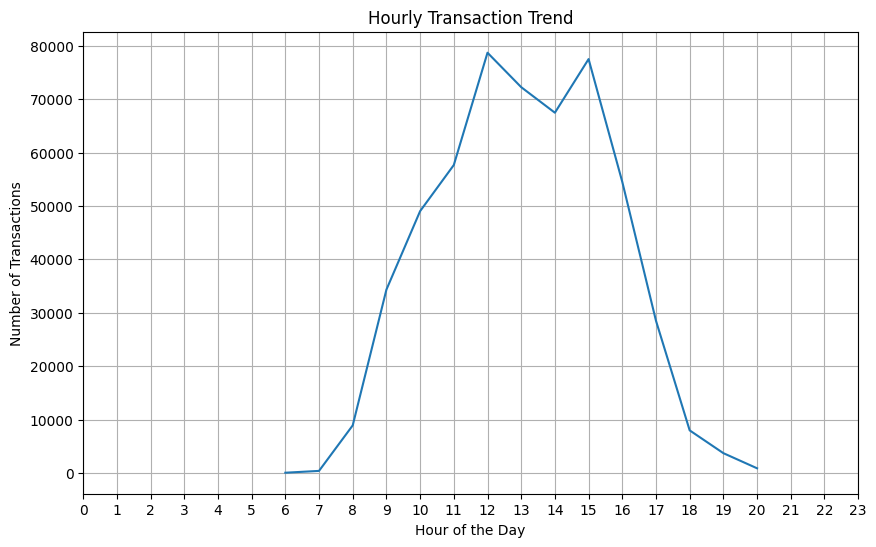

In [77]:
# prompt: analisis pada pukul berapa dia melakukan transaksi dalam time frame

# Convert 'InvoiceDate' to datetime objects if not already done
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the hour from the InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Group by hour and count the number of transactions
hourly_transactions = df.groupby('Hour')['InvoiceNo'].count()

# Plot the hourly transaction counts
plt.figure(figsize=(10, 6))
plt.plot(hourly_transactions.index, hourly_transactions.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction Trend')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

# You can also analyze the peak hours for transactions and identify potential patterns in customer behavior.
# For instance, you might find that most transactions occur during specific hours of the day,
# which could be useful for scheduling promotions or advertising campaigns.


Top 10 Most Profitable Products:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalPrice, dtype: float64

Bottom 10 Least Profitable Products:
Description
WOODEN BOX ADVENT CALENDAR           -45.700
CREAM SWEETHEART MAGAZINE RACK       -46.850
WHITE CHERRY LIGHTS                  -54.000
SAMPLES                            -3049.390
Discount                           -5696.220
Bank Charges                       -7175.639
CRUK Commission                    -7933.430
Adjust bad debt                   -11062.060
Manual                          

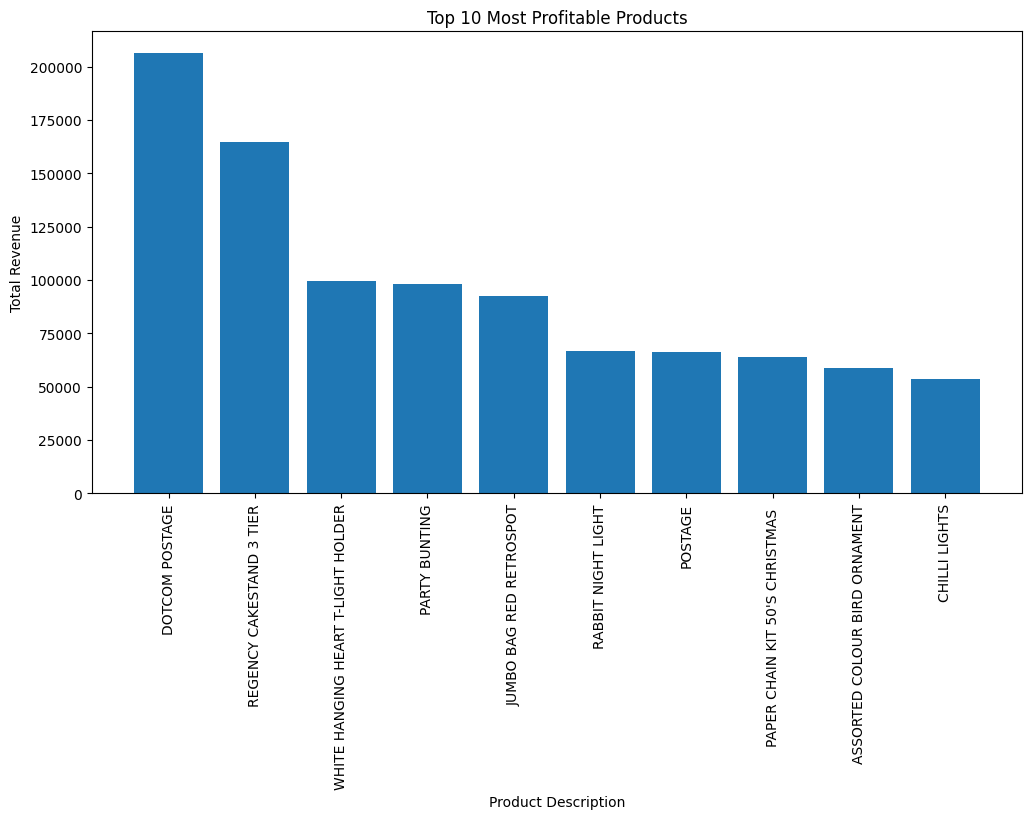

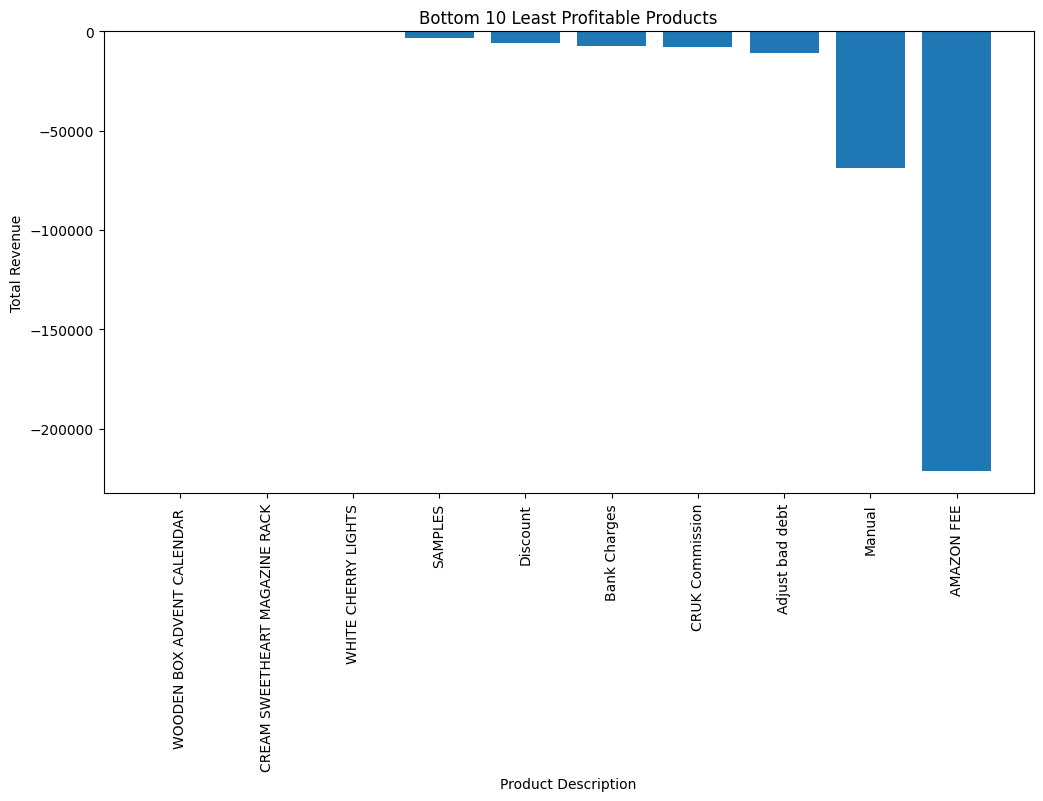

In [142]:
# prompt: analisis produk yang paling menguntungkan  begitu juga yang paling tidak dalam bar plot dan print

# Calculate total revenue for each product
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

# Get the top 10 most profitable products
top_10_products = product_revenue.head(10)

# Get the bottom 10 least profitable products
bottom_10_products = product_revenue.tail(10)

# Print the top 10 and bottom 10 products
print("Top 10 Most Profitable Products:")
print(top_10_products)
print("\nBottom 10 Least Profitable Products:")
print(bottom_10_products)


# Create a bar plot for the top 10 most profitable products
plt.figure(figsize=(12, 6))
plt.bar(top_10_products.index, top_10_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.title('Top 10 Most Profitable Products')
plt.show()


# Create a bar plot for the bottom 10 least profitable products
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_products.index, bottom_10_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.title('Bottom 10 Least Profitable Products')
plt.show()
